<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#COMP30024-Artificial-Intelligence-Project-1-Report" data-toc-modified-id="COMP30024-Artificial-Intelligence-Project-1-Report-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>COMP30024 Artificial Intelligence Project 1 Report</a></span><ul class="toc-item"><li><span><a href="#import" data-toc-modified-id="import-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>import</a></span></li><li><span><a href="#new-analysis" data-toc-modified-id="new-analysis-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>new analysis</a></span><ul class="toc-item"><li><span><a href="#generate-all-test-case" data-toc-modified-id="generate-all-test-case-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>generate all test case</a></span></li><li><span><a href="#store-output" data-toc-modified-id="store-output-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>store output</a></span></li><li><span><a href="#draw-graph" data-toc-modified-id="draw-graph-1.2.3"><span class="toc-item-num">1.2.3&nbsp;&nbsp;</span>draw graph</a></span></li></ul></li></ul></li></ul></div>

# COMP30024 Artificial Intelligence Project 1 Report

## import

In [76]:
import pandas as pd
import numpy as np
import glob
import os
import timeit
from subprocess import call
import subprocess
import json
import matplotlib.pyplot as plt

## new analysis

In [2]:
# root = 'C:\\Users\\53421\\PycharmProjects\\ai-project\\project1'
# root = "e://backup/code/python/ai-project/project1"
# os.chdir(root)

### generate all test case

### store output

DataFrame: #piece, #block, avg b, d, relative error, runtime, space

time python data.py

In [77]:
summary = pd.read_csv("out.csv", sep=',', index_col=False)
summary_clean = summary.drop(summary.columns[0], axis=1)

In [78]:
summary_clean[summary_clean["runtime(in ms)"] >= 15 * 1000]

,number of pieces,number of blocks,average branching factor,depth of search tree,relative error,runtime(in ms),space used(in MB),preprocess time(in ms),file name
2418,4.0,2.0,5.707407,18.0,4.0,46900.9177,8053.0,69.9143,./fullTestCase/4p/2b27.json
2456,4.0,4.0,6.198768,17.0,3.0,16989.6251,8053.0,68.0612,./fullTestCase/4p/4b5.json
2465,4.0,4.0,6.566561,18.0,3.0,48427.3837,8053.0,70.1676,./fullTestCase/4p/4b14.json
2477,4.0,4.0,6.056020,16.0,3.0,15519.4387,8053.0,70.8009,./fullTestCase/4p/4b26.json
2686,4.0,11.0,5.448647,18.0,2.0,28496.4767,8053.0,69.5047,./fullTestCase/4p/11b26.json


In [6]:
print(type(summary))

<class 'pandas.core.frame.DataFrame'>


In [9]:
summary.head(10)

,Unnamed: 0,number of pieces,number of blocks,average branching factor,depth of search tree,relative error,runtime(in ms),space used(in MB),preprocess time(in ms),file name
0,0,1.0,0.0,2.125000,3.0,1.0,130.5571,8053.0,79.7653,./fullTestCase/1p/0b0.json
1,1,1.0,0.0,1.375000,6.0,2.0,116.3522,8053.0,69.4994,./fullTestCase/1p/0b1.json
2,2,1.0,0.0,2.500000,3.0,1.0,111.8574,8053.0,70.4765,./fullTestCase/1p/0b2.json
3,3,1.0,0.0,1.909091,4.0,1.0,118.5168,8053.0,70.0839,./fullTestCase/1p/0b3.json
4,4,1.0,0.0,2.500000,3.0,1.0,109.6352,8053.0,70.5172,./fullTestCase/1p/0b4.json
5,5,1.0,0.0,1.225806,7.0,3.0,117.0719,8053.0,71.3245,./fullTestCase/1p/0b5.json
6,6,1.0,0.0,1.384615,7.0,3.0,116.6916,8053.0,73.3110,./fullTestCase/1p/0b6.json
7,7,1.0,0.0,1.478261,6.0,2.0,116.1268,8053.0,71.6433,./fullTestCase/1p/0b7.json
8,8,1.0,0.0,1.909091,4.0,1.0,117.0988,8053.0,71.9156,./fullTestCase/1p/0b8.json
9,9,1.0,0.0,4.000000,1.0,0.0,111.2789,8053.0,71.2645,./fullTestCase/1p/0b9.json


In [10]:
summary.tail(10)

,Unnamed: 0,number of pieces,number of blocks,average branching factor,depth of search tree,relative error,runtime(in ms),space used(in MB),preprocess time(in ms),file name
3062,3062,4.0,29.0,2.241379,11.0,0.0,120.5958,8053.0,68.1500,./fullTestCase/4p/29b10.json
3063,3063,4.0,29.0,2.759259,15.0,0.0,139.9353,8053.0,69.4390,./fullTestCase/4p/29b15.json
3064,3064,4.0,29.0,3.133333,12.0,0.0,141.4403,8053.0,68.1182,./fullTestCase/4p/29b16.json
3065,3065,4.0,30.0,1.762500,14.0,1.0,148.2035,8053.0,68.8715,./fullTestCase/4p/30b9.json
3066,3066,4.0,30.0,2.212121,10.0,0.0,125.9285,8053.0,67.6246,./fullTestCase/4p/30b18.json
3067,3067,4.0,30.0,1.629630,12.0,0.0,119.1836,8053.0,69.3883,./fullTestCase/4p/30b25.json
3068,3068,4.0,31.0,1.600000,10.0,0.0,122.5639,8053.0,68.8283,./fullTestCase/4p/31b1.json
3069,3069,4.0,31.0,1.735294,14.0,1.0,122.5236,8053.0,66.9403,./fullTestCase/4p/31b10.json
3070,3070,4.0,31.0,2.642857,6.0,0.0,115.1390,8053.0,68.4873,./fullTestCase/4p/31b28.json
3071,3071,4.0,31.0,1.703704,11.0,0.0,123.9063,8053.0,68.2309,./fullTestCase/4p/31b29.json


### draw graph

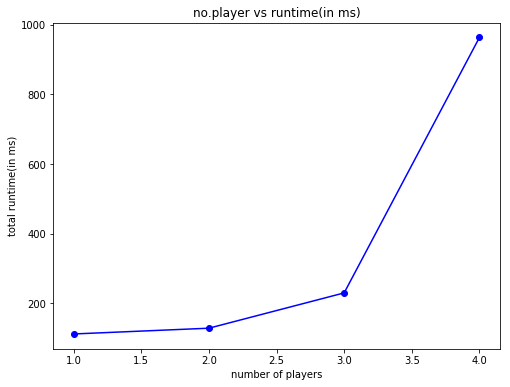

In [58]:
grouped = summary.groupby('number of pieces')
p_runtime = []
p_preprocess_time = []
p_execution_time = []
players = []
for i, group in grouped:
    players.append(i)
    p_runtime.append(group['runtime(in ms)'].mean())
    p_preprocess_time.append(group['preprocess time(in ms)'].mean())
    p_execution_time.append(p_runtime[len(p_runtime) - 1] - p_preprocess_time[len(p_preprocess_time) - 1])


plt.figure(figsize = [8, 6])

plt.plot(player, p_runtime, "bo-")
plt.title("no.player vs runtime(in ms)")
plt.xlabel("number of players")
plt.ylabel("total runtime(in ms)")
plt.show()

In [64]:
grouped = summary.groupby('number of blocks')
b_runtime = []
b_preprocess_time = []
b_execution_time = []
blocks = []
for i, group in grouped:
    blocks.append(i)
    b_runtime.append(group['runtime(in ms)'].mean())
    b_preprocess_time.append(group['preprocess time(in ms)'].mean())
    b_execution_time.append(b_runtime[len(b_runtime) - 1] - b_preprocess_time[len(b_preprocess_time) - 1])


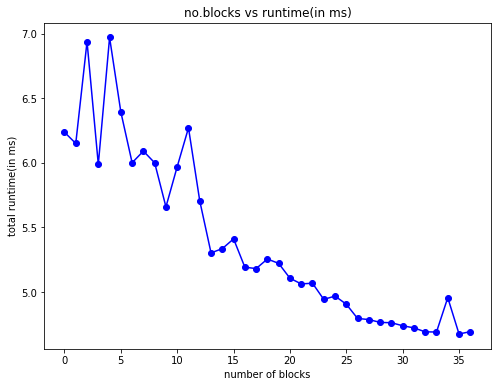

In [71]:
from math import log

loged = list(map(log, b_runtime))

plt.figure(figsize = [8, 6])

# plt.plot(blocks, b_runtime, "bo-")
plt.plot(blocks, loged, "bo-")
plt.title("no.blocks vs runtime(in ms)")
plt.xlabel("number of blocks")
plt.ylabel("total runtime(in ms)")
plt.show()

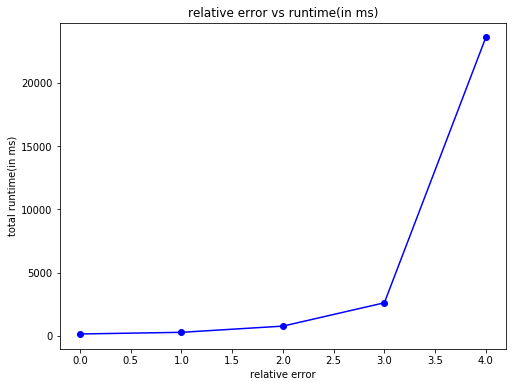

In [72]:
grouped = summary.groupby('relative error')
r_runtime = []
r_preprocess_time = []
r_execution_time = []
error = []
for i, group in grouped:
    error.append(i)
    r_runtime.append(group['runtime(in ms)'].mean())
    r_preprocess_time.append(group['preprocess time(in ms)'].mean())
    r_execution_time.append(r_runtime[len(r_runtime) - 1] - r_preprocess_time[len(r_preprocess_time) - 1])


plt.figure(figsize = [8, 6])

plt.plot(error, r_runtime, "bo-")
plt.title("relative error vs runtime(in ms)")
plt.xlabel("relative error")
plt.ylabel("total runtime(in ms)")
plt.show()

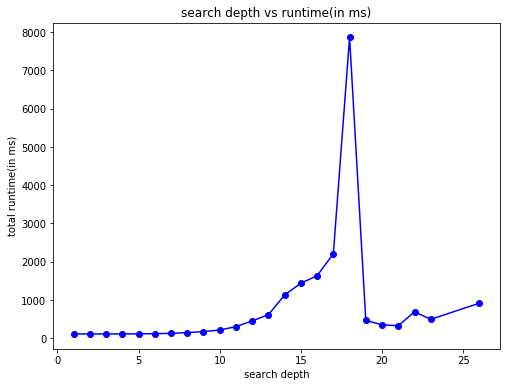

In [73]:
grouped = summary.groupby('depth of search tree')
d_runtime = []
d_preprocess_time = []
d_execution_time = []
depth = []
for i, group in grouped:
    depth.append(i)
    d_runtime.append(group['runtime(in ms)'].mean())
    d_preprocess_time.append(group['preprocess time(in ms)'].mean())
    d_execution_time.append(d_runtime[len(d_runtime) - 1] - d_preprocess_time[len(d_preprocess_time) - 1])


plt.figure(figsize = [8, 6])

plt.plot(depth, d_runtime, "bo-")
plt.title("search depth vs runtime(in ms)")
plt.xlabel("search depth")
plt.ylabel("total runtime(in ms)")
plt.show()

In [75]:
summary[summary['depth of search tree'] == 18]

,Unnamed: 0,number of pieces,number of blocks,average branching factor,depth of search tree,relative error,runtime(in ms),space used(in MB),preprocess time(in ms),file name
2418,2418,4.0,2.0,5.707407,18.0,4.0,46900.9177,8053.0,69.9143,./fullTestCase/4p/2b27.json
2465,2465,4.0,4.0,6.566561,18.0,3.0,48427.3837,8053.0,70.1676,./fullTestCase/4p/4b14.json
2678,2678,4.0,11.0,7.564906,18.0,2.0,1711.8329,8053.0,69.1903,./fullTestCase/4p/11b18.json
2686,2686,4.0,11.0,5.448647,18.0,2.0,28496.4767,8053.0,69.5047,./fullTestCase/4p/11b26.json
2687,2687,4.0,11.0,7.100082,18.0,2.0,1616.7385,8053.0,68.3804,./fullTestCase/4p/11b27.json
2713,2713,4.0,12.0,5.975639,18.0,1.0,2310.0510,8053.0,69.6643,./fullTestCase/4p/12b23.json
2734,2734,4.0,13.0,7.770370,18.0,1.0,820.6886,8053.0,67.7728,./fullTestCase/4p/13b14.json
2820,2820,4.0,16.0,10.593750,18.0,0.0,346.2674,8053.0,67.5975,./fullTestCase/4p/16b13.json
2862,2862,4.0,17.0,7.619718,18.0,0.0,251.5043,8053.0,68.7270,./fullTestCase/4p/17b27.json
2864,2864,4.0,17.0,6.491713,18.0,1.0,278.3297,8053.0,69.1676,./fullTestCase/4p/17b29.json
